[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

In [1]:
# Baixar arquivos adicionais para o laboratório.
!wget https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/ml_intro/class_03/Laborat%C3%B3rios/lab_utils_ml_intro_week_3.zip
!unzip -n -q lab_utils_ml_intro_week_3.zip

--2024-03-21 11:21:16--  https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/ml_intro/class_03/Laborat%C3%B3rios/lab_utils_ml_intro_week_3.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fabiobento/dnn-course-2024-1/main/00_course_folder/ml_intro/class_03/Laborat%C3%B3rios/lab_utils_ml_intro_week_3.zip [following]
--2024-03-21 11:21:17--  https://raw.githubusercontent.com/fabiobento/dnn-course-2024-1/main/00_course_folder/ml_intro/class_03/Laborat%C3%B3rios/lab_utils_ml_intro_week_3.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1045923 (1021K) [application/zip]


In [2]:
# Testar se estamos no Google Colab
try:
  import google.colab
  IN_COLAB = True
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  IN_COLAB = False

# Regressão Logística, Fronteira de Decisão(_Decision Boundary_)


## Objetivos
Neste laboratório, você fará o seguinte:
- Traçar a fronteira de decisão para um modelo de regressão logística. Isso lhe dará uma noção melhor do que o modelo está prevendo.



In [3]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, draw_vthresh
plt.style.use('./deeplearning.mplstyle')

## Conjunto de Dados

Vamos supor que você tenha o seguinte conjunto de dados de treinamento
- A variável de entrada `X` é uma matriz numérica que tem 6 exemplos de treinamento, cada um com dois recursos
- A variável de saída `y` também é uma matriz numpy com 6 exemplos, e `y` é `0` ou `1`

In [5]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

### Plotar dados 

Vamos usar uma função auxiliar para plotar esses dados. Os pontos de dados com o rótulo $y=1$ são mostrados como cruzes vermelhas, enquanto os pontos de dados com o rótulo $y=0$ são mostrados como círculos azuis. 

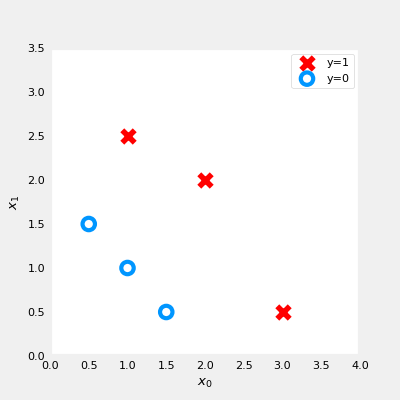

In [6]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Modelo de Regressão Logística


* Suponha que você queira treinar um modelo de regressão logística nesses dados, que tem a forma   

  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  onde $g(z) = \frac{1}{1+e^{-z}}$, que é a função sigmoide


* Digamos que você tenha treinado o modelo e obtido os parâmetros como $b = -3, w_0 = 1, w_1 = 1$. Isso é,

  $f(x) = g(x_0+x_1-3)$

  (Você aprenderá a ajustar esses parâmetros aos dados mais adiante no curso)
  
  
Vamos tentar entender o que esse modelo treinado está prevendo traçando sua fronteira de decisão

### Revisão sobre Regressão Logística e Fronteira de Decisão

* Lembre-se de que, para a regressão logística, o modelo é representado como 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  em que $g(z)$ é conhecida como função sigmoide e mapeia todos os valores de entrada para valores entre 0 e 1:

  $$g(z) = \frac{1}{1+e^{-z}}\tag{2}$$
  e $$\mathbf{w} \cdot \mathbf{x}$$ é o produto vetorial de pontos:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * Interpretamos o resultado do modelo ($f_{\mathbf{w},b}(x)$) como a probabilidade de que $y=1$ dado $\mathbf{x}$ e parametrizado por $\mathbf{w}$ e $b$.
* Portanto, para obter uma previsão final ($y=0$ ou $y=1$) do modelo de regressão logística, podemos usar a seguinte heurística -

  se $f_{\mathbf{w},b}(x) >= 0,5$, preveja $y=1$
  
  se $f_{\mathbf{w},b}(x) < 0,5$, preveja $y=0$
  
  
* Vamos plotar a função sigmoide para ver onde $g(z) >= 0,5

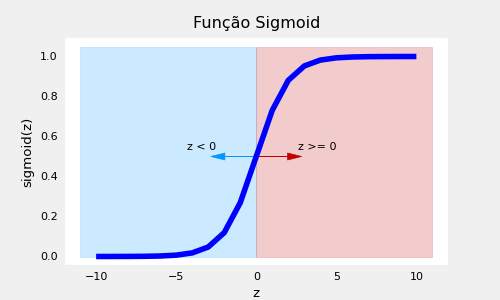

In [9]:
# Plotar sigmoid(z) em um intervalo de valores de -10 a 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plotar z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Função Sigmoid")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

* Como você pode ver, $g(z) >= 0,5$ para $z >=0$

* Para um modelo de regressão logística, $z = \mathbf{w} \cdot \mathbf{x} + b$. Portanto,

  se $\mathbf{w} \cdot \mathbf{x} + b >= 0$, o modelo prevê $y=1$
  
  se $\mathbf{w} \cdot \mathbf{x} + b < 0$, o modelo prevê $y=0$
  
  
  
### Plotar fronteira de decisão

Agora, vamos voltar ao nosso exemplo para entender como o modelo de regressão logística está fazendo previsões.

* Nosso modelo de regressão logística tem a forma

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* Com base no que você aprendeu acima, você pode ver que esse modelo prevê $y=1$ se $-3 + x_0+x_1 >= 0$

Vamos ver como isso se parece graficamente. Começaremos plotando $-3 + x_0+x_1 = 0$, o que equivale a $x_1 = 3 - x_0$.


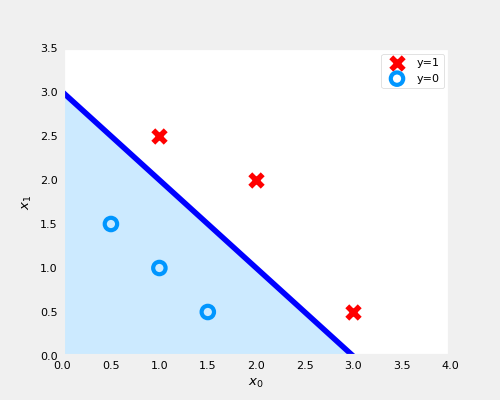

In [8]:
# Escolher valores entre 0 e 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plotar a fronteira de decisão
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

* No gráfico acima, alinha azul significa a função $x_0 + x_1 - 3 = 0$ e ela deve ser o intercepto do eixo x1 em 3 (if we set $x_1$ = 3, $x_0$ = 0) e do eixo x0 em 3 (se definirmos $x_1$ = 0, $x_0$ = 3). 


* A região sombreada representa $-3 + x_0+x_1 < 0$. A região sobre a linha é $-3 + x_0+x_1 > 0$.


* Em qualquer ponto na região sombreada (sob a linha) é classificada como $y=0$.  Qualquer ponto sob ou abaixo a linha é classificada como $y=1$. Essa linha é conhecida como "fronteira de decisão".

Como vimos nas aulas, ao utilizar polinôminos de ordem superior (eg: $f(x) = g( x_0^2 + x_1 -1)$, podemos obter fronteiras de decisão não-lineares mais complexas.

## Parabéns!
Você explorou a fronteira de decisão no contexto da regressão logística.